# Data Exploration

## Name: <span style="color:blue"> *Azaan Patil* </span>

In [45]:
from typing import List, Dict, Tuple
import os
import gc
import traceback
import warnings
from pdb import set_trace
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Default seed
seed = 0

# Data Exploration

#### Data Loading and Displaying

In [46]:
import os
house_df = pd.read_csv("../Data/House_listings_dataset.csv")

house_df = house_df.rename(columns={
    'Bedroom': 'bed',
    'Bathroom': 'bath',
    'ConvertedLot': 'acre_lot',
    'Area': 'house_size',
    'State': 'state',
    'Price': 'price'
})

house_df['property_type'] = house_df['City']

house_df = house_df.dropna(subset=['bed', 'bath', 'acre_lot', 'house_size', 'state', 'price'])

Accessing individual data

In [47]:
print(house_df)

      state         City           Street  Zipcode   Latitude   Longitude  \
0        AL     Saraland         Scott Dr  36571.0  30.819534  -88.095960   
1        AL    Southside     Big Oak Dr W  35907.0  33.881050  -86.012436   
2        AL  Robertsdale  Cowpen Creek Rd  36567.0  30.590004  -87.580376   
4        AL      Chelsea       Mallet Way  35043.0  33.357986  -86.608700   
6        AL   Montgomery      Brampton Ln  36117.0  32.372746  -86.165115   
...     ...          ...              ...      ...        ...         ...   
24516    WY        Burns        Road 210a  82053.0  41.149517 -104.439620   
24517    WY         Cody      Lincoln Ave  82414.0  44.524570 -109.033844   
24518    WY       Dubois         Mason Dr  82513.0  43.521640 -109.594050   
24519    WY     Cheyenne      Carolina Rd  82009.0  41.138450 -105.052790   
24520    WY   Evansville           6th St  82636.0  42.865440 -106.277450   

       bed  bath  house_size        PPSq     LotArea  acre_lot LotUnit  \
0

In [48]:
display(house_df)

,state,City,Street,Zipcode,Latitude,Longitude,bed,bath,house_size,PPSq,LotArea,acre_lot,LotUnit,MarketEstimate,RentEstimate,price,property_type
0,AL,Saraland,Scott Dr,36571.0,30.819534,-88.095960,4.0,2.0,1614.0,148.636927,0.38050,0.38050,acres,240600.0,1599.0,239900.0,Saraland
1,AL,Southside,Big Oak Dr W,35907.0,33.881050,-86.012436,3.0,2.0,1474.0,0.000678,0.67034,0.67034,acres,186700.0,1381.0,1.0,Southside
2,AL,Robertsdale,Cowpen Creek Rd,36567.0,30.590004,-87.580376,3.0,2.0,1800.0,144.388889,3.20000,3.20000,acres,NaN,NaN,259900.0,Robertsdale
4,AL,Chelsea,Mallet Way,35043.0,33.357986,-86.608700,3.0,3.0,2224.0,150.629496,0.26000,0.26000,acres,336200.0,1932.0,335000.0,Chelsea
6,AL,Montgomery,Brampton Ln,36117.0,32.372746,-86.165115,3.0,2.0,1564.0,96.547315,8712.00000,0.20000,sqft,150500.0,1385.0,151000.0,Montgomery
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24516,WY,Burns,Road 210a,82053.0,41.149517,-104.439620,2.0,1.0,1112.0,337.230216,20.00000,20.00000,acres,368600.0,1500.0,375000.0,Burns
24517,WY,Cody,Lincoln Ave,82414.0,44.524570,-109.033844,2.0,3.0,1232.0,241.801948,1306.80000,0.03000,sqft,NaN,NaN,297900.0,Cody
24518,WY,Dubois,Mason Dr,82513.0,43.521640,-109.594050,2.0,2.0,2016.0,262.896825,1.42000,1.42000,acres,NaN,2294.0,530000.0,Dubois
24519,WY,Cheyenne,Carolina Rd,82009.0,41.138450,-105.052790,3.0,2.0,2930.0,196.552901,6.23000,6.23000,acres,558000.0,2749.0,575900.0,Cheyenne


In [49]:
feature_names = house_df.columns

print(f'The feature names are:\n{feature_names.values}')

The feature names are:
['state' 'City' 'Street' 'Zipcode' 'Latitude' 'Longitude' 'bed' 'bath'
 'house_size' 'PPSq' 'LotArea' 'acre_lot' 'LotUnit' 'MarketEstimate'
 'RentEstimate' 'price' 'property_type']


# Data Visualization and Exploration

## Defining the features

    state - The state where the property is located
    City - The city where the property is located
    bed - Number of bedrooms in the property
    bath - Number of bathrooms in the property
    acre_lot - Size of the lot in acres (converted from various units)
    house_size - The total living area of the house in square feet
    property_type - Property location type (derived from city)
    price - The listing price of the property (our target variable)
    
The numeric features (bed, bath, acre_lot, house_size) are straightforward - they represent physical characteristics of the property. The categorical features (state, property_type) provide geographic context. The target variable 'price' represents the market value of each property.


#### Data Info 

In [50]:
house_shape = house_df.shape

print(f'The house listings dataset shape is: {house_shape}')

The house listings dataset shape is: (22012, 17)


In [51]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22012 entries, 0 to 24520
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   state           22012 non-null  object 
 1   City            22012 non-null  object 
 2   Street          22008 non-null  object 
 3   Zipcode         22012 non-null  float64
 4   Latitude        22012 non-null  float64
 5   Longitude       22012 non-null  float64
 6   bed             22012 non-null  float64
 7   bath            22012 non-null  float64
 8   house_size      22012 non-null  float64
 9   PPSq            21840 non-null  float64
 10  LotArea         22012 non-null  float64
 11  acre_lot        22012 non-null  float64
 12  LotUnit         22012 non-null  object 
 13  MarketEstimate  15028 non-null  float64
 14  RentEstimate    16258 non-null  float64
 15  price           22012 non-null  float64
 16  property_type   22012 non-null  object 
dtypes: float64(12), object(5)
memory usa

In [52]:
state_counts = house_df["state"].value_counts()
display(state_counts)

state
IN    498
CT    496
AZ    492
AK    491
CA    490
MI    489
ME    485
ND    484
GA    481
MO    481
TX    478
ID    477
IA    477
KY    474
CO    473
VA    471
OK    469
MS    469
AR    468
KS    466
MD    461
PA    460
MA    459
NE    458
SD    458
AL    453
NH    453
NM    453
UT    448
WI    448
VT    446
OH    444
FL    443
WY    435
DE    433
RI    432
MN    432
NV    428
IL    427
WA    425
SC    418
LA    418
MT    409
WV    406
NC    404
TN    387
OR    379
NY    361
NJ    325
Name: count, dtype: int64

#### Properties by State Visualization

Lets look at a bar graph representation of how many properties are in each state.

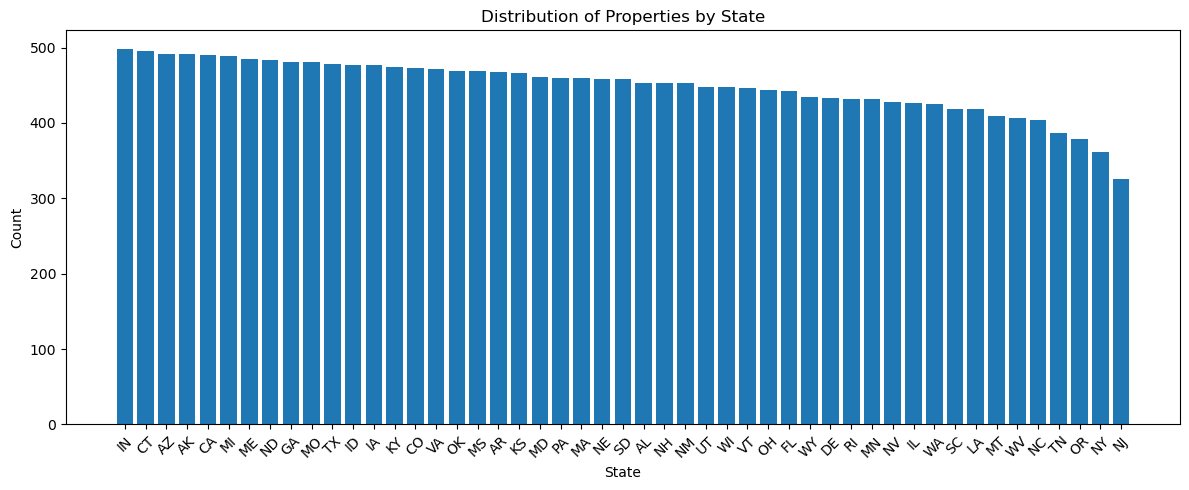

In [53]:

plt.figure(figsize=(12, 5))
plt.bar(state_counts.index, state_counts.values)
plt.xlabel("State")
plt.ylabel("Count")
plt.title("Distribution of Properties by State")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [54]:
type_counts = house_df["property_type"].value_counts()

display(type_counts)

property_type
Lincoln        229
Las Vegas      208
Albuquerque    109
Kansas City    105
Anchorage      101
              ... 
Glendo           1
Baggs            1
Banner           1
Pavillion        1
La Barge         1
Name: count, Length: 5445, dtype: int64

Properties by City Visualization

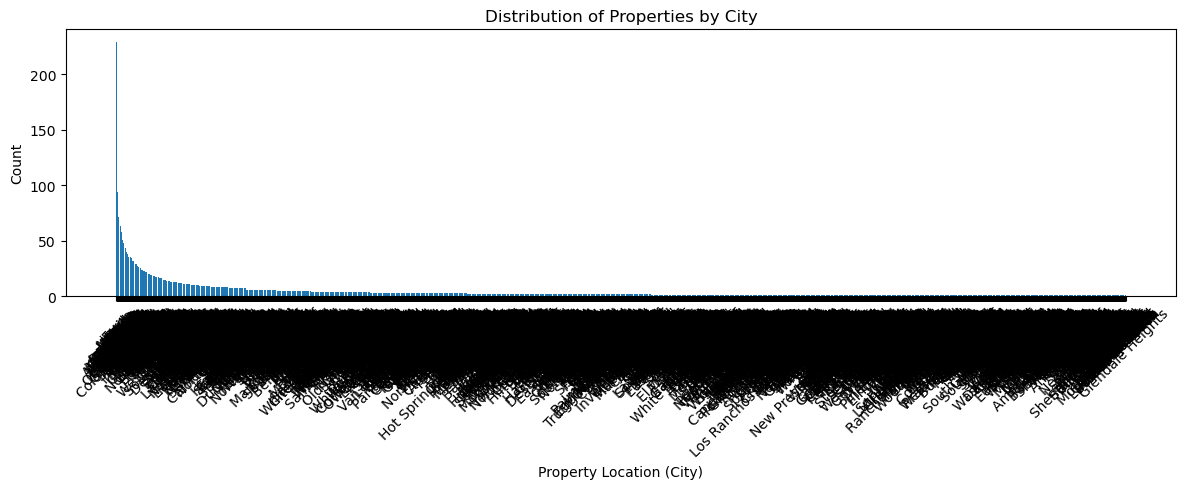

In [55]:
plt.figure(figsize=(12, 5))
plt.bar(type_counts.index, type_counts.values)
plt.xlabel("Property Location (City)")
plt.ylabel("Count")
plt.title("Distribution of Properties by City")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Null Check

In [56]:
house_isnull = house_df.isnull()

display(house_isnull)

,state,City,Street,Zipcode,Latitude,Longitude,bed,bath,house_size,PPSq,LotArea,acre_lot,LotUnit,MarketEstimate,RentEstimate,price,property_type
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24516,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
24517,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
24518,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
24519,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [57]:
hasnull = np.any(house_isnull)

print(f"Value of hasnull is {hasnull}")

Value of hasnull is True


#### Statistics

In [58]:
house_describe = house_df.describe()

display(house_describe)

,Zipcode,Latitude,Longitude,bed,bath,house_size,PPSq,LotArea,acre_lot,MarketEstimate,RentEstimate,price
count,22012.000000,22012.000000,22012.000000,22012.000000,22012.000000,22012.000000,21840.000000,22012.000000,22012.000000,1.502800e+04,16258.000000,2.201200e+04
mean,50259.243549,39.772988,-92.449819,3.412321,2.430522,2136.545929,258.220729,2837.971285,9.892825,4.871339e+05,2633.216263,5.440265e+05
std,29473.896026,5.724638,16.882956,1.109264,1.191802,1616.353298,3965.138182,3767.355886,607.516523,1.010631e+06,3717.661621,1.630858e+06
min,1002.000000,25.449816,-161.772780,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.570000e+04,100.000000,0.000000e+00
25%,25801.000000,35.930176,-103.514775,3.000000,2.000000,1404.000000,132.951280,0.510009,0.174242,2.339000e+05,1650.000000,2.290000e+05
50%,52230.000000,39.924080,-89.402630,3.000000,2.000000,1860.000000,184.385324,3.955000,0.300000,3.455500e+05,2165.000000,3.490000e+05
75%,74648.500000,42.950553,-79.776697,4.000000,3.000000,2484.000000,257.150206,6534.000000,0.960000,5.032250e+05,2829.000000,5.000000e+05
max,99950.000000,65.044370,-67.016030,36.000000,30.000000,99990.000000,550000.000000,87517.000000,87517.000000,3.687690e+07,176194.000000,7.200000e+07


Boxplots

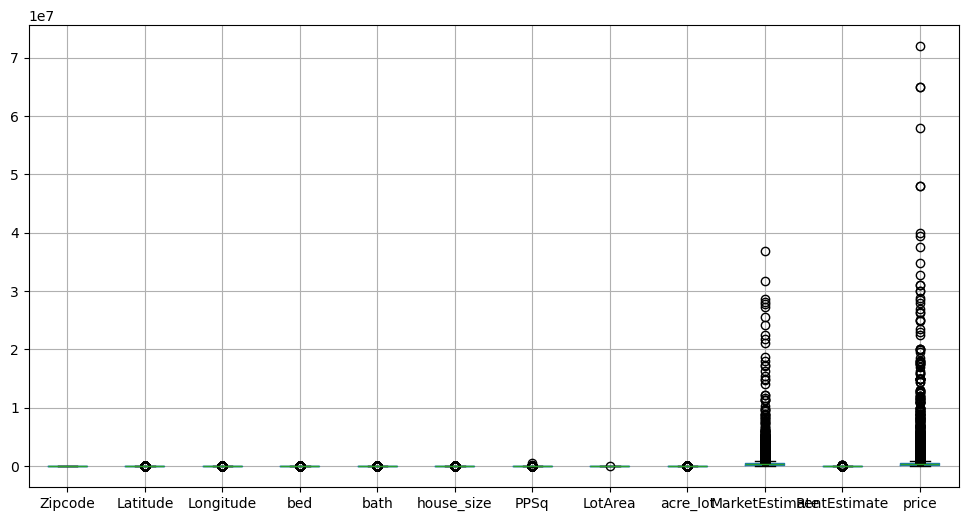

In [59]:
house_df.boxplot(figsize=(12,6))
plt.show()

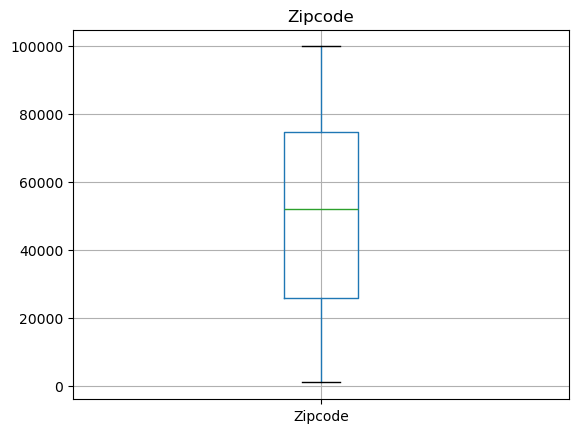

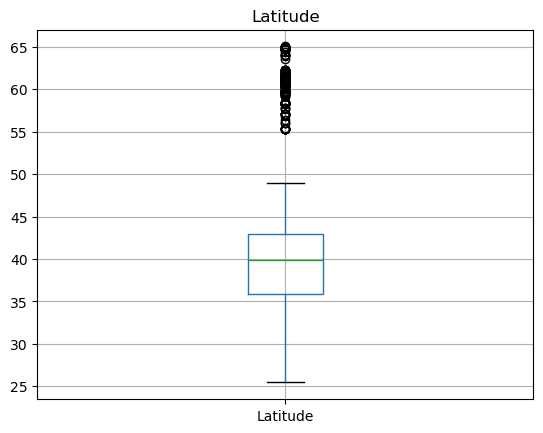

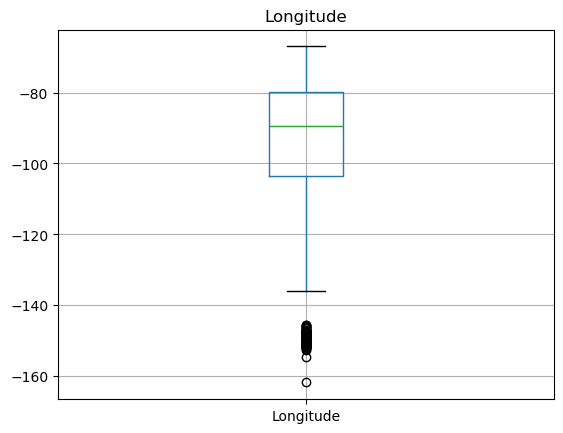

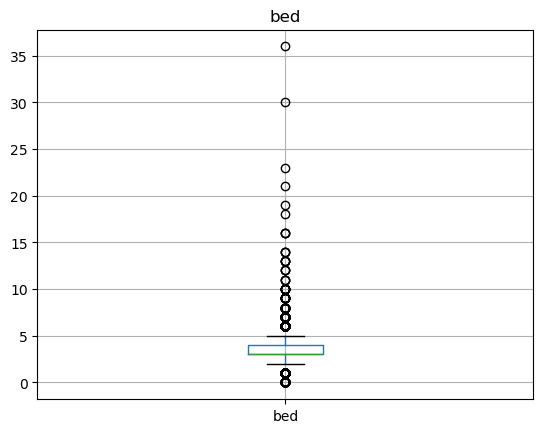

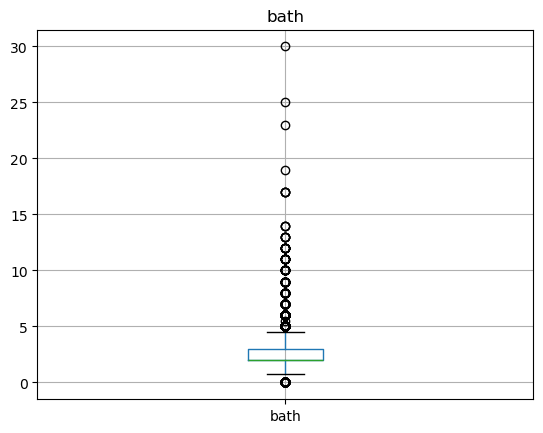

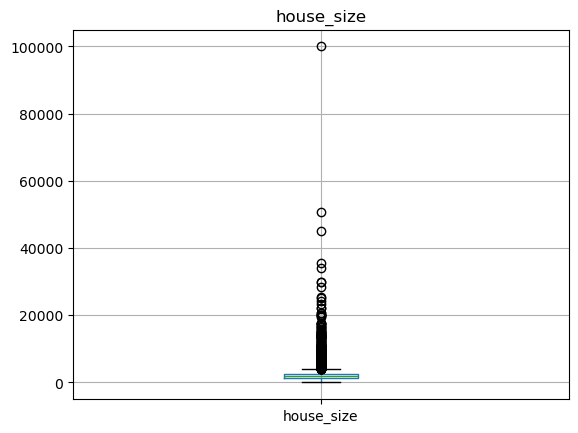

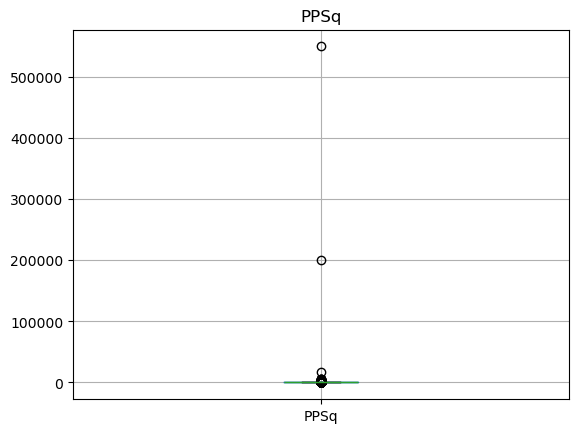

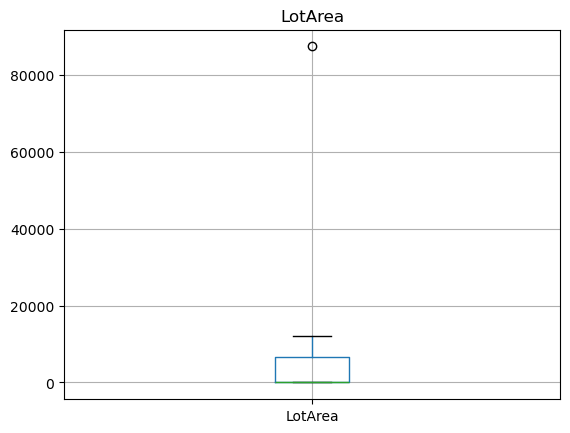

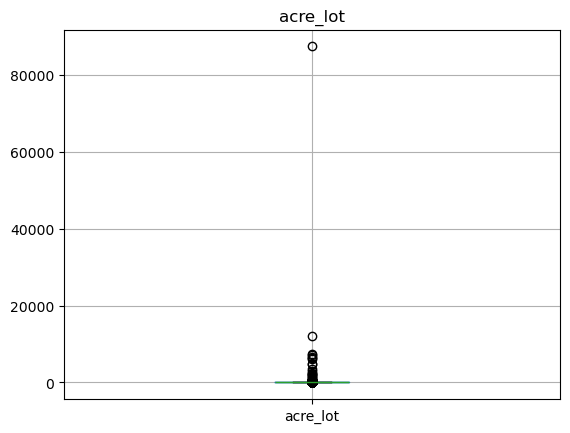

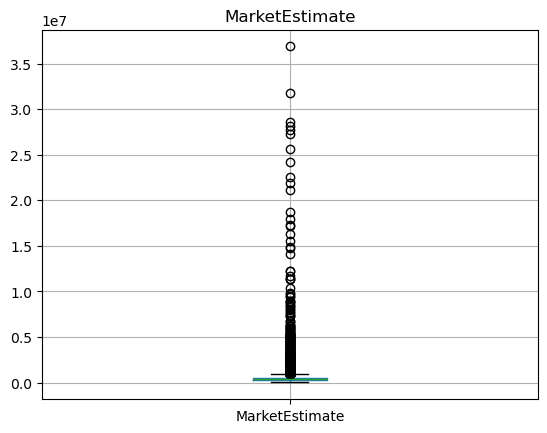

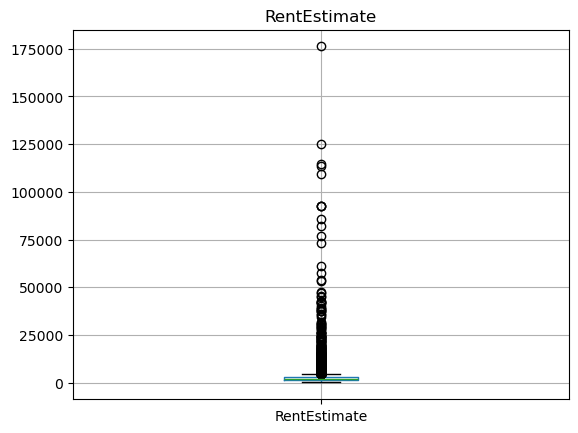

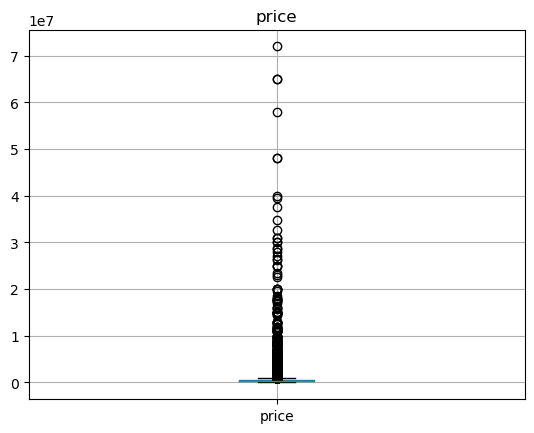

In [60]:
numeric_cols = house_df.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    house_df.boxplot(column=col)
    plt.title(col)
    plt.show()

#### Visualization

In [61]:
price_values = house_df["price"]

display(price_values)

0        239900.0
1             1.0
2        259900.0
4        335000.0
6        151000.0
           ...   
24516    375000.0
24517    297900.0
24518    530000.0
24519    575900.0
24520    329900.0
Name: price, Length: 22012, dtype: float64

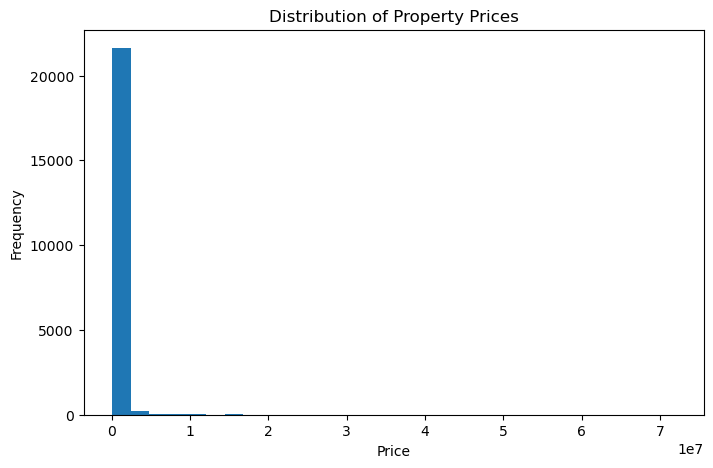

In [62]:
plt.figure(figsize=(8,5))
plt.hist(price_values, bins=30)
plt.title("Distribution of Property Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

In [63]:
price_value_count = price_values.value_counts()

display(price_value_count)

price
350000.0      235
250000.0      220
299900.0      215
325000.0      201
275000.0      197
             ... 
58000000.0      1
2197000.0       1
473000.0        1
163395.0        1
37500000.0      1
Name: count, Length: 2734, dtype: int64

In [64]:
price_value_count = price_value_count.sort_index()

display(price_value_count)

price
0.0           22
1.0           27
500.0          1
1000.0         4
1234.0         1
              ..
40000000.0     1
48000000.0     2
58000000.0     1
65000000.0     2
72000000.0     1
Name: count, Length: 2734, dtype: int64

#### Area Transformation

In [65]:
log_price_values = np.log(price_values + 1)

display(log_price_values)

0        12.387982
1         0.693147
2        12.468056
4        12.721889
6        11.925042
           ...    
24516    12.834684
24517    12.604516
24518    13.180634
24519    13.263691
24520    12.706548
Name: price, Length: 22012, dtype: float64

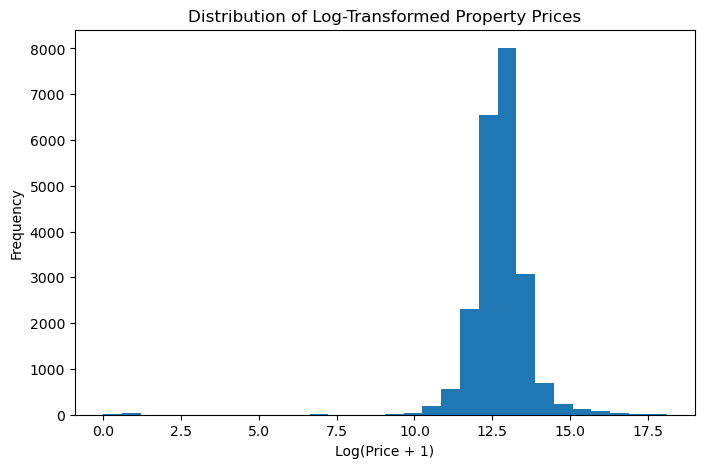

In [66]:
plt.figure(figsize=(8,5))
plt.hist(log_price_values, bins=30)
plt.title("Distribution of Log-Transformed Property Prices")
plt.xlabel("Log(Price + 1)")
plt.ylabel("Frequency")
plt.show()

In [67]:
log_price_describe = log_price_values.describe()

display(log_price_describe)

count    22012.000000
mean        12.728292
std          0.971874
min          0.000000
25%         12.341482
50%         12.762830
75%         13.122365
max         18.092177
Name: price, dtype: float64

Now, if you take a look at the mean and STD you should see that the STD value more in line with the mean. Additionally, you should see that the max value has shrunk significantly. 

#### Feature Scatter Matrix

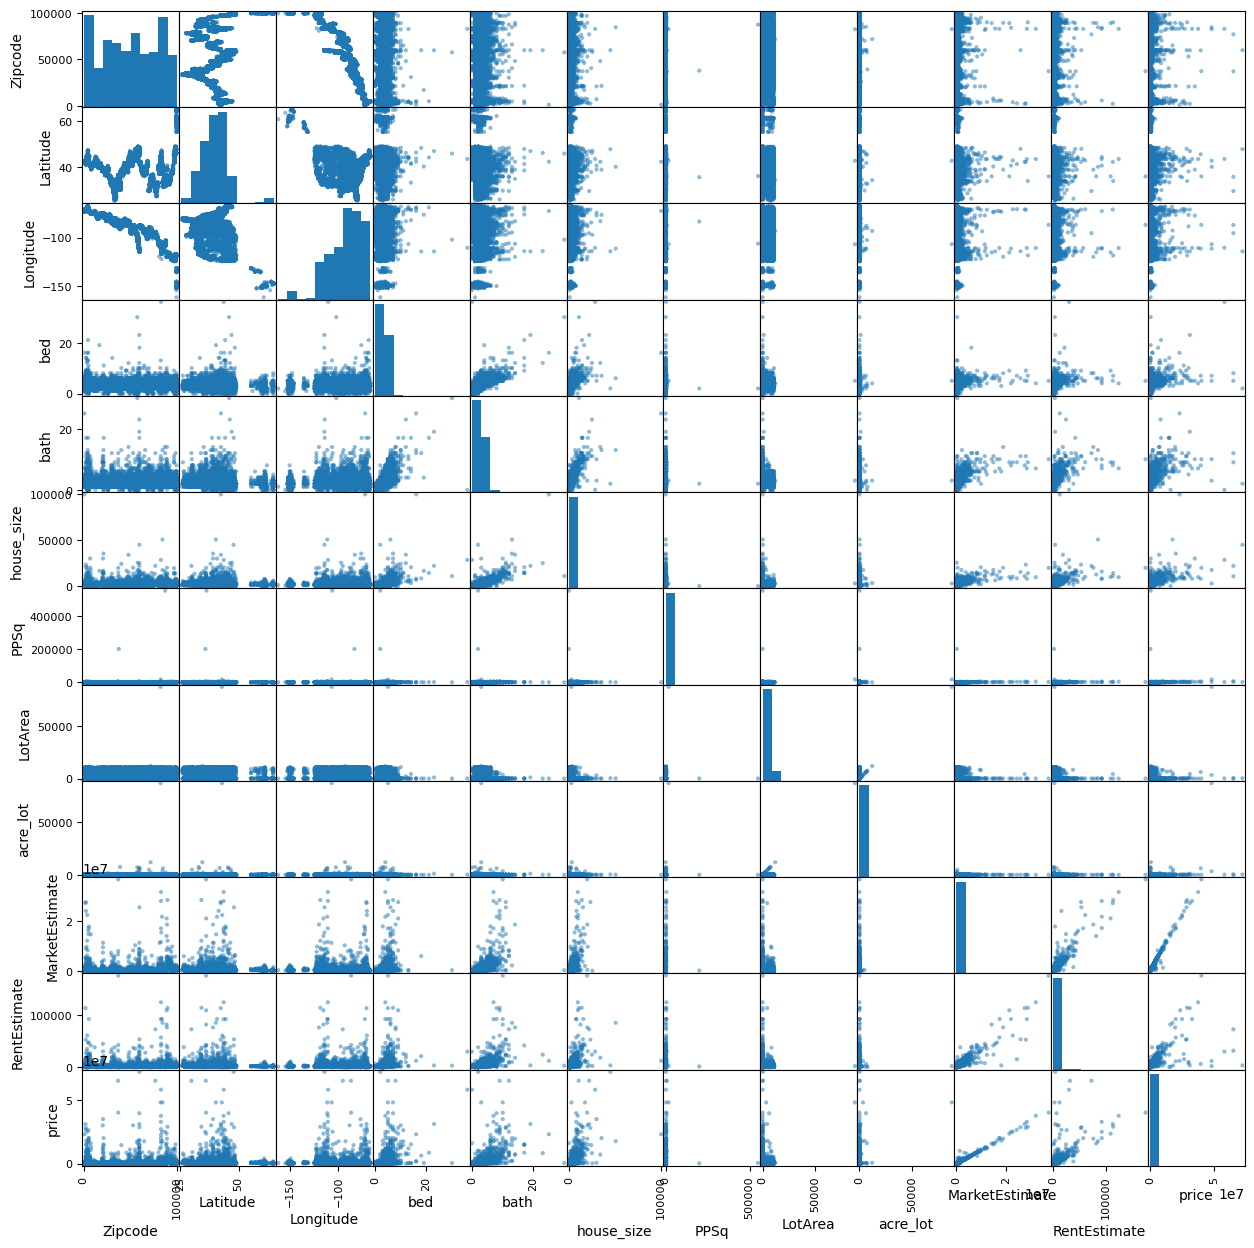

In [68]:
# TODO 8.1
from pandas.plotting import scatter_matrix

scatter_matrix(house_df, figsize=(15, 15))
plt.show()

#### Area-Feature Scatter Matrix

Numeric columns (excluding price):
['Zipcode', 'Latitude', 'Longitude', 'bed', 'bath', 'house_size', 'PPSq', 'LotArea', 'acre_lot', 'MarketEstimate', 'RentEstimate']


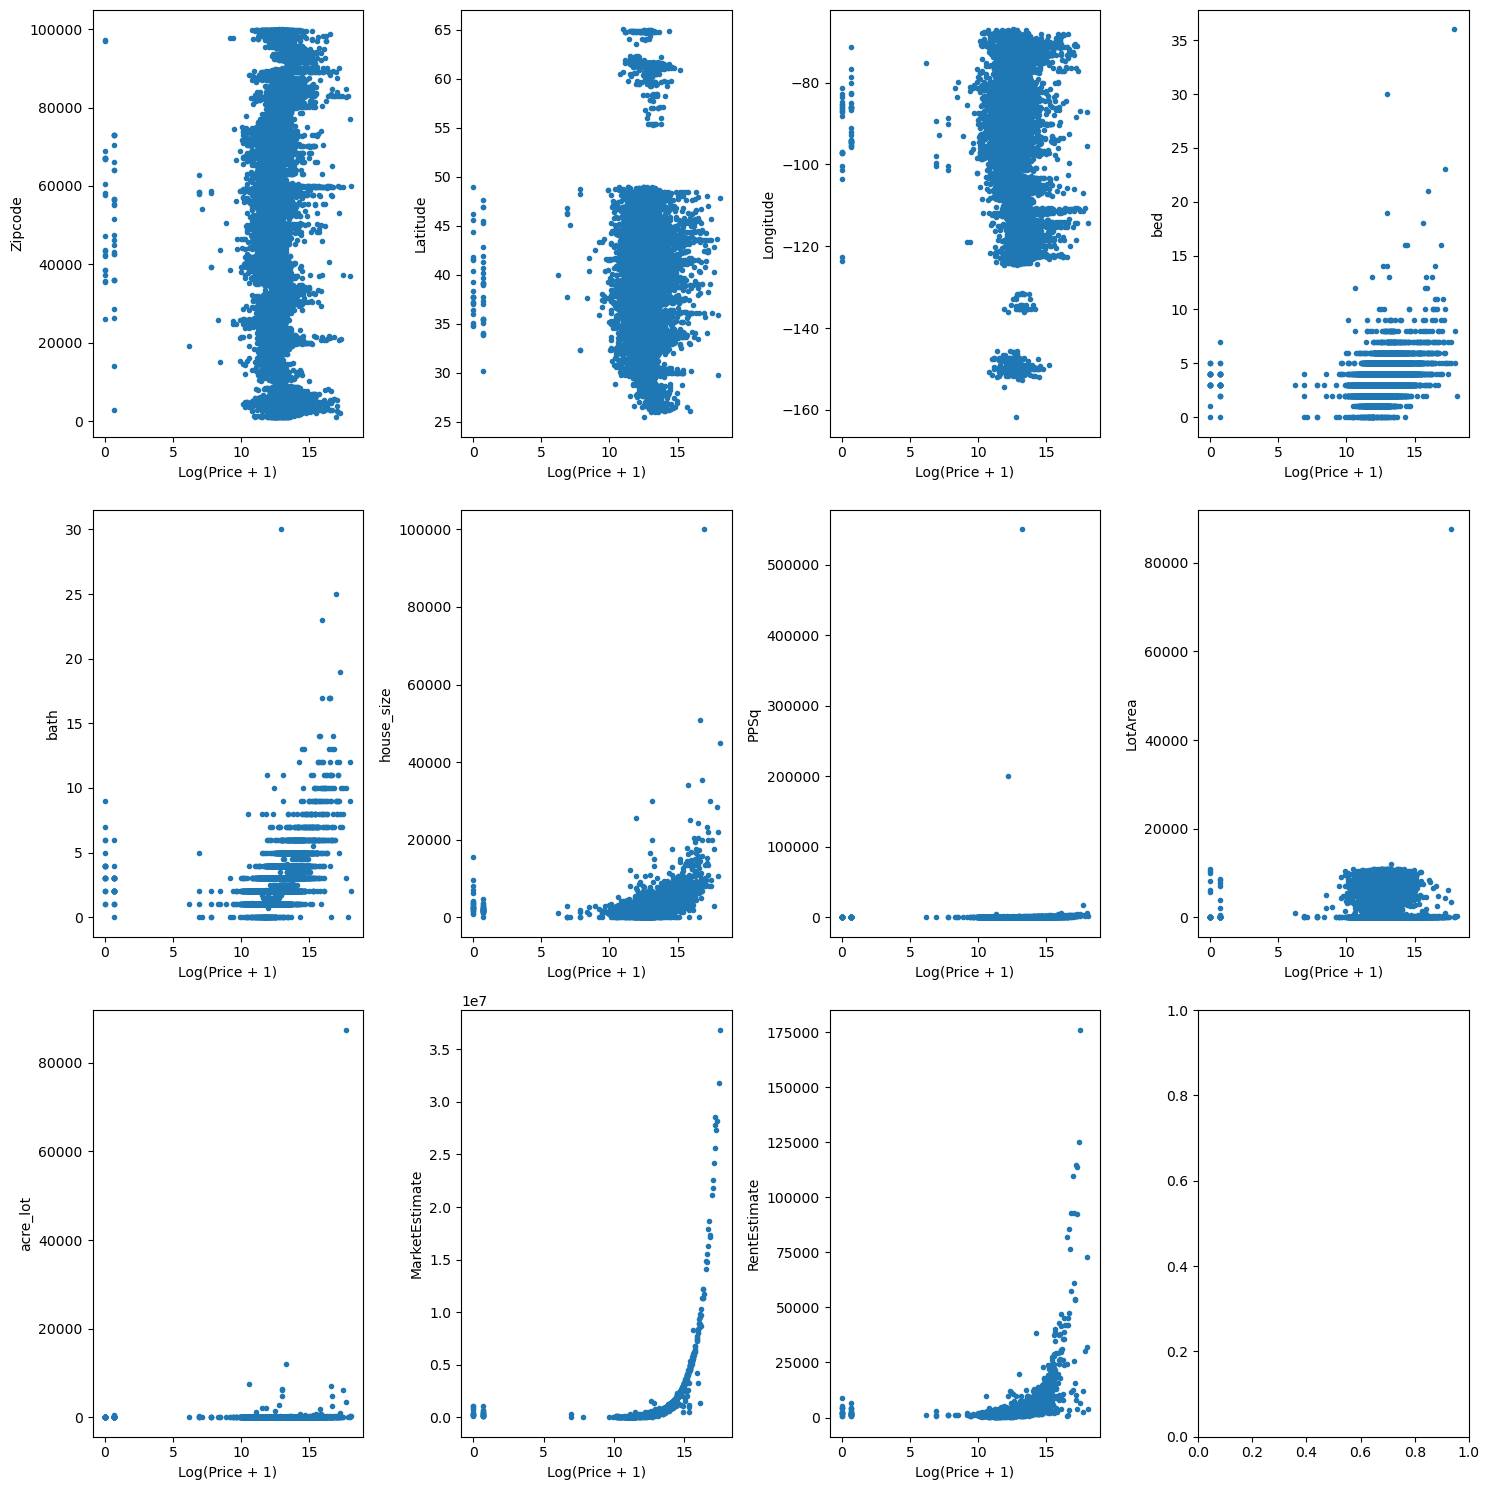

In [69]:
from pandas.plotting import scatter_matrix
X = house_df.drop("price", axis=1)

numeric_cols_no_price = [col for col in numeric_cols if col != "price"]

print(f"Numeric columns (excluding price):\n{numeric_cols_no_price}")

fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(15, 15))
ax = ax.flatten()

for idx, column_name in enumerate(numeric_cols_no_price):
    current_ax = ax[idx]
    current_ax.plot(log_price_values, house_df[column_name], '.')
    current_ax.set_ylabel(column_name)
    current_ax.set_xlabel('Log(Price + 1)')
    
fig.tight_layout()
plt.show()

#### Correlation Matrix

In [70]:
corr_matrix = house_df.corr(numeric_only=True)

display(corr_matrix.style.background_gradient())

,Zipcode,Latitude,Longitude,bed,bath,house_size,PPSq,LotArea,acre_lot,MarketEstimate,RentEstimate,price
Zipcode,1.000000,0.081839,-0.913076,-0.001436,0.022482,0.019514,0.008950,0.164117,0.008975,0.020836,-0.017561,0.015208
Latitude,0.081839,1.000000,-0.323116,-0.020873,-0.054512,0.011627,-0.002620,-0.071079,0.003964,0.019512,0.013285,0.023263
Longitude,-0.913076,-0.323116,1.000000,0.002909,-0.023533,-0.026039,-0.009720,-0.125585,-0.007746,-0.053836,-0.015120,-0.042891
bed,-0.001436,-0.020873,0.002909,1.000000,0.624716,0.555256,-0.008099,-0.016498,0.014265,0.238439,0.275956,0.295389
bath,0.022482,-0.054512,-0.023533,0.624716,1.000000,0.722994,0.008669,-0.092423,0.010003,0.462573,0.478296,0.435540
house_size,0.019514,0.011627,-0.026039,0.555256,0.722994,1.000000,-0.001877,-0.116122,0.014046,0.563325,0.505947,0.580214
PPSq,0.008950,-0.002620,-0.009720,-0.008099,0.008669,-0.001877,1.000000,-0.003365,0.029354,0.072989,0.065170,0.038742
LotArea,0.164117,-0.071079,-0.125585,-0.016498,-0.092423,-0.116122,-0.003365,1.000000,0.149253,-0.059861,-0.067702,-0.027452
acre_lot,0.008975,0.003964,-0.007746,0.014265,0.010003,0.014046,0.029354,0.149253,1.000000,0.031572,0.003378,0.228677
MarketEstimate,0.020836,0.019512,-0.053836,0.238439,0.462573,0.563325,0.072989,-0.059861,0.031572,1.000000,0.904757,0.992601


In [71]:
price_corr = corr_matrix["price"]

display(price_corr)

Zipcode           0.015208
Latitude          0.023263
Longitude        -0.042891
bed               0.295389
bath              0.435540
house_size        0.580214
PPSq              0.038742
LotArea          -0.027452
acre_lot          0.228677
MarketEstimate    0.992601
RentEstimate      0.667818
price             1.000000
Name: price, dtype: float64